In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('D:/4th year/Machine Learning/Practice/penguins_binary_classification.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [27]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [29]:
df.describe(include = 'object')

,species,island
count,274,274
unique,2,3
top,Adelie,Biscoe
freq,151,167


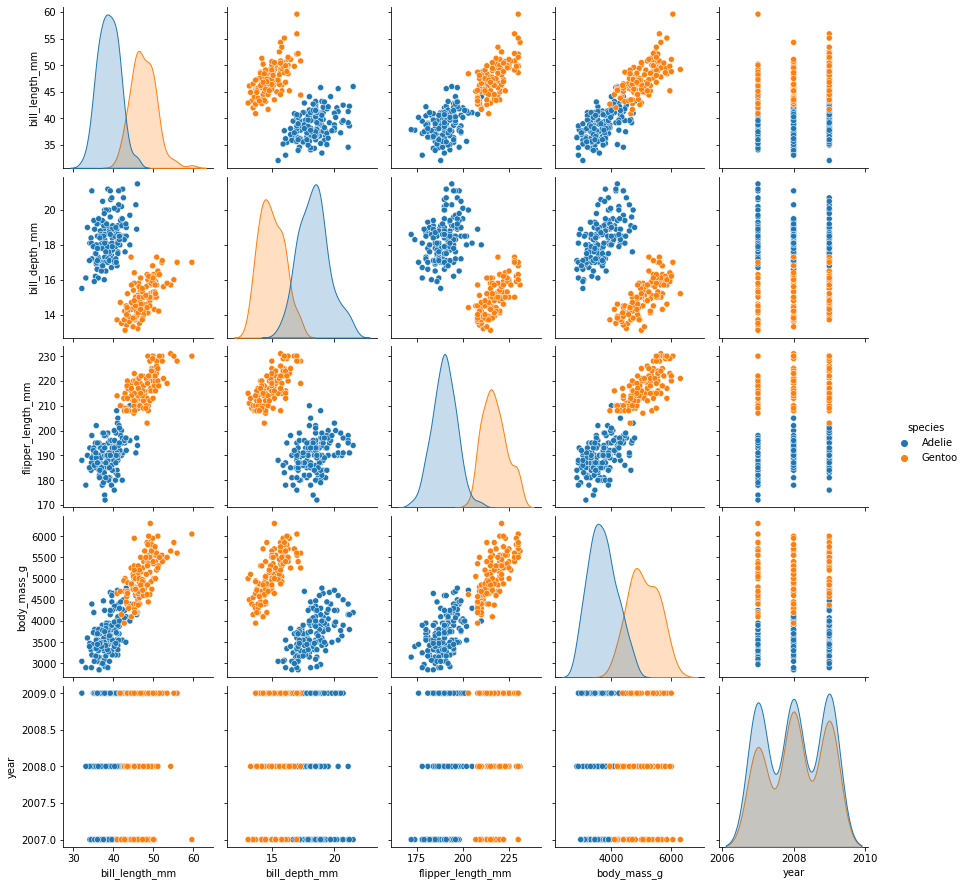

In [30]:
sns.pairplot(data=df, hue='species')

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['species'] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])

In [32]:
X = df.drop('species', axis = 1)
y = df['species']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

LogisticRegression()

In [43]:
accuracy = model.score(X_test, y_test) * 100
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}%")


Model Evaluation:
Accuracy: 100.00%


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[30  0]
 [ 0 25]]


In [50]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


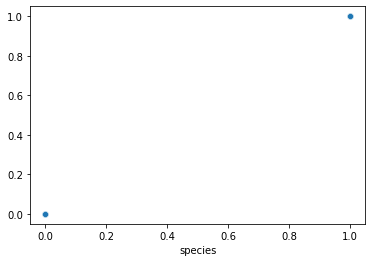

In [54]:
sns.scatterplot( y_test, model.predict(X_test))
plt.show()

Unique values in model predictions: [0 1]
Unique values in 'Actual': [0 1]
Unique values in 'Predicted': [0 1]
Distribution of 'Actual' values:
0    30
1    25
Name: Actual, dtype: int64


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

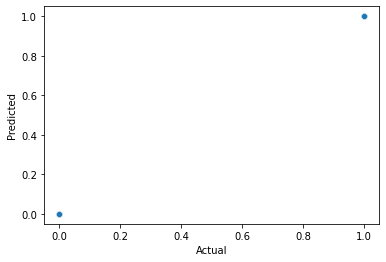

In [63]:
print("Unique values in model predictions:", np.unique(model.predict(X_test)))
print("Unique values in 'Actual':", check['Actual'].unique())
print("Unique values in 'Predicted':", check['Predicted'].unique())
print("Distribution of 'Actual' values:")
print(check['Actual'].value_counts())
sns.scatterplot(data=check, x='Actual', y='Predicted')
